# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as ppsir 
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Reading and Understanding the Data

In [4]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [7]:
# Missing Values

df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

There are No Missing values in the dataset.

In [8]:
# Column rename.

df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Exploratory Data Analysis

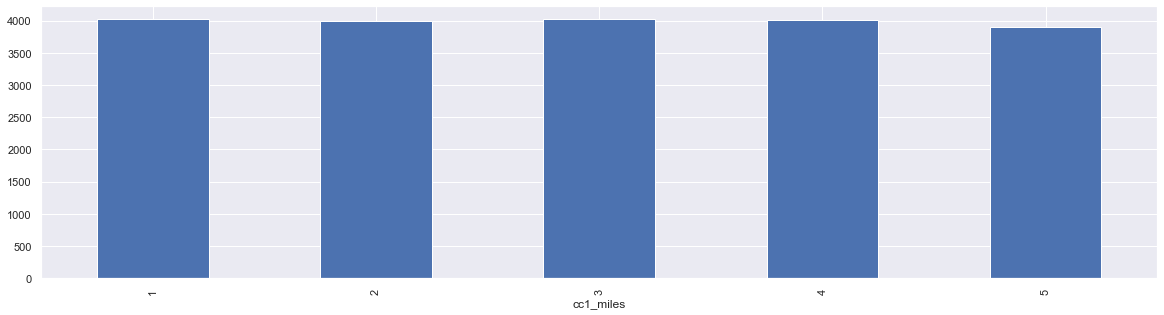

In [9]:
plt.figure(figsize=(20,5))
df.groupby('cc1_miles')['ID'].max().plot(kind='bar')

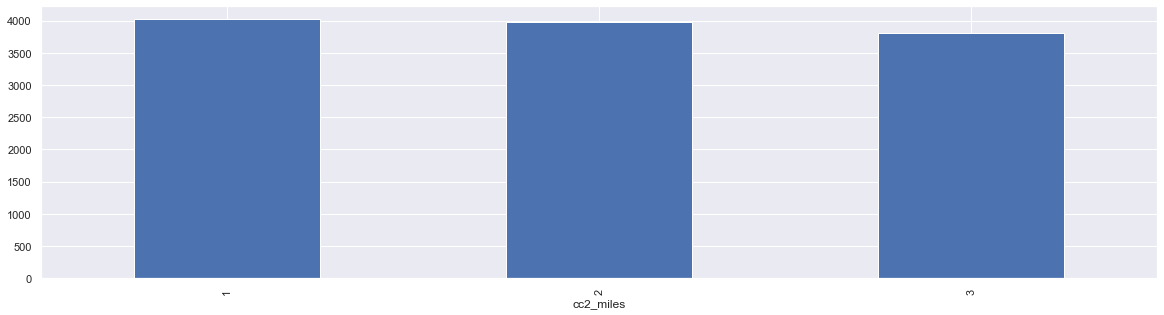

In [10]:
plt.figure(figsize=(20,5))
df.groupby('cc2_miles')['ID'].max().plot(kind='bar')

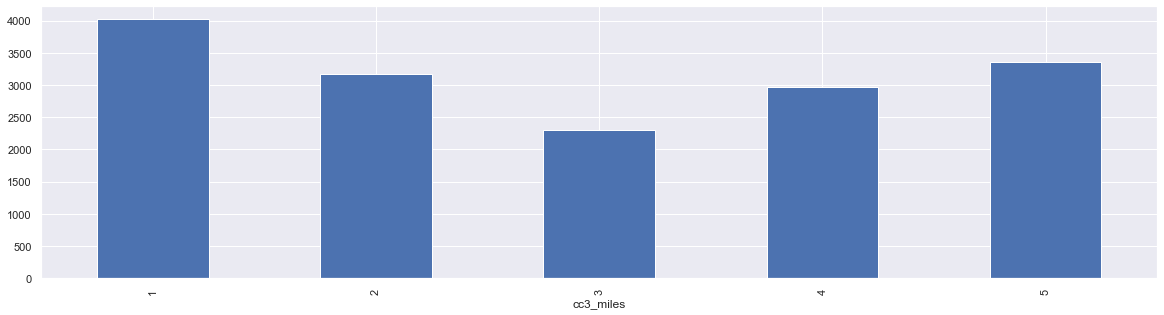

In [11]:
plt.figure(figsize=(20,5))
df.groupby('cc3_miles')['ID'].max().plot(kind='bar')

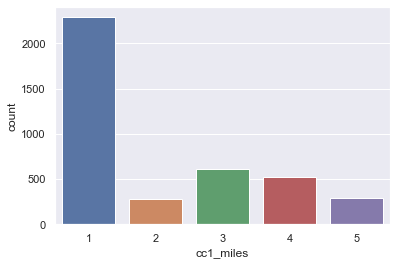

In [12]:
sns.countplot(x ='cc1_miles', data = df)

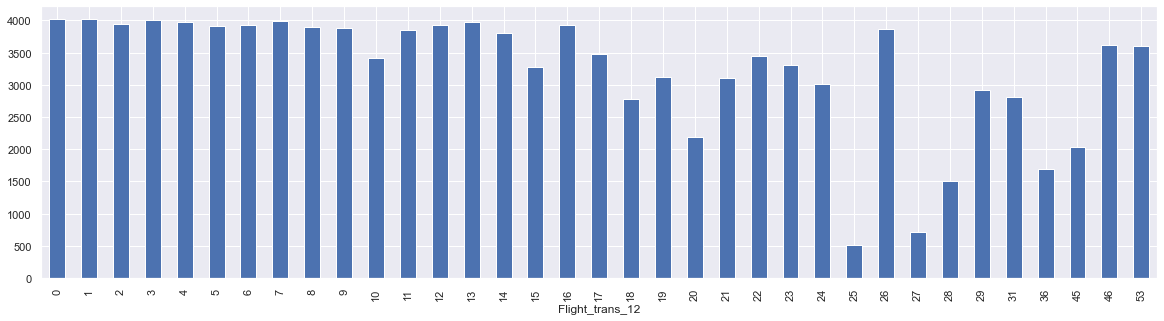

In [13]:
plt.figure(figsize=(20,5))
df.groupby('Flight_trans_12')['ID'].max().plot(kind='bar')

# Correlation Plot

Text(0.5, 1.05, 'Pearson correlation of Features')

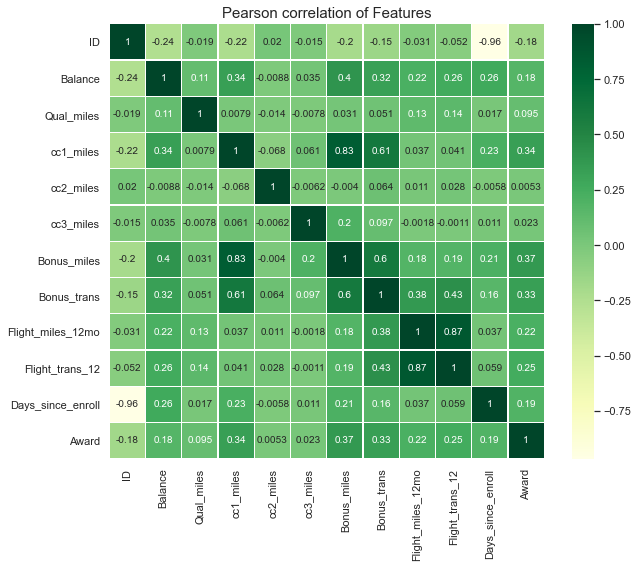

In [14]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

<li>Bonus Miles is correlated with CC1_miles
<li>Bonus_trans is correlated with CC1_miles
<li>Bonus_miles is correlated with Bonus_tans
<li>Flight_miles_12mo is correlated with Flight_trans 12
<li> ID is negatively correlated with Days_since_enroll

# Scatter plot

Text(0, 0.5, 'Bonus_miles')

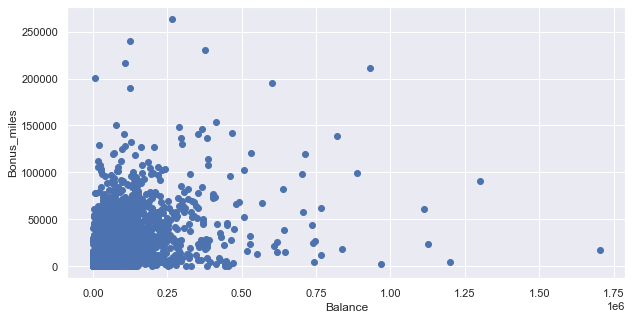

In [15]:
plt.figure(figsize=(10,5))
plt.scatter('Balance','Bonus_miles',data=df)
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')

Text(0, 0.5, 'Flight_trans_12')

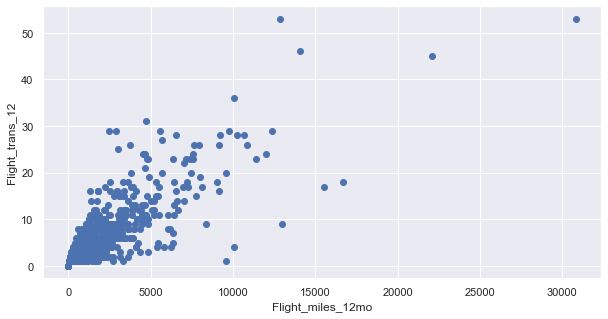

In [16]:
plt.figure(figsize=(10,5))
plt.scatter('Flight_miles_12mo','Flight_trans_12',data=df)
plt.xlabel('Flight_miles_12mo')
plt.ylabel('Flight_trans_12')

Text(0, 0.5, 'Bonus_trans')

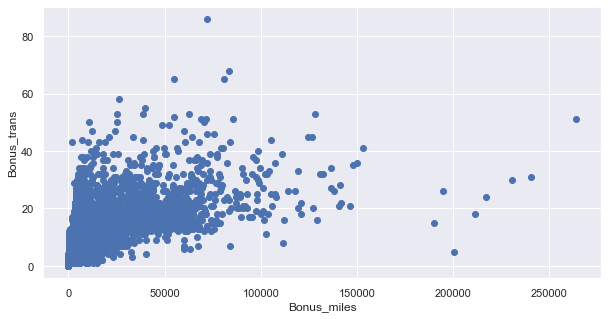

In [17]:
plt.figure(figsize=(10,5))
plt.scatter('Bonus_miles','Bonus_trans',data=df)
plt.xlabel('Bonus_miles')
plt.ylabel('Bonus_trans')

All of the above plots have a linear realtionship with each other. We can use these features to form our clusters.

In [18]:
#ID & award will not make much contribution during clustering. we will drop both columns.

df2 =  df.drop(['ID','Award'], axis=1)
df2.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


# Data Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(df2)
std_df.shape

(3999, 10)

# Dendogram with different types of Linkages: 

### 1) Single Linkage:

Text(0, 0.5, 'Euclidean distances')

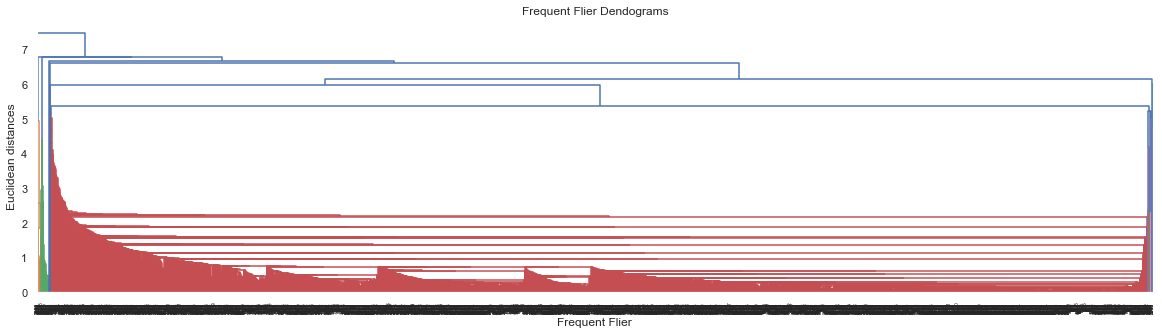

In [20]:
plt.figure(figsize=(20,5))
plt.title("Frequent Flier Dendograms")
dend = sch.dendrogram(sch.linkage(std_df, method='single'))
plt.xlabel('Frequent Flier')
plt.ylabel('Euclidean distances')

### 2) Complete Linkage:

Text(0, 0.5, 'Euclidean distances')

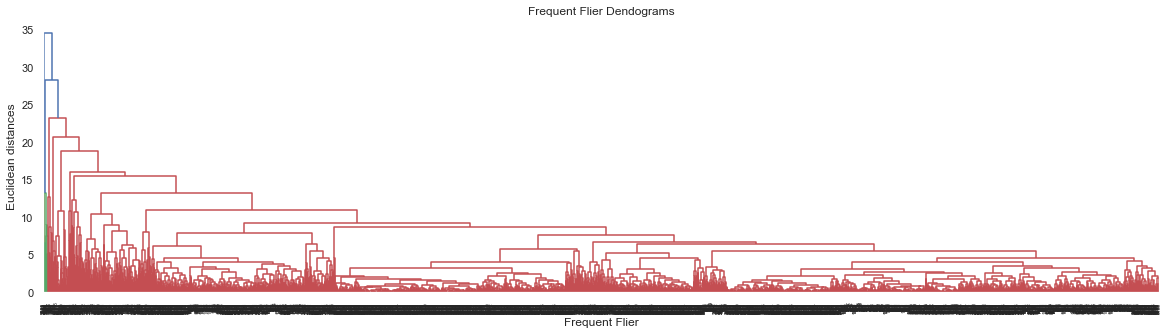

In [21]:
plt.figure(figsize=(20,5))
plt.title("Frequent Flier Dendograms")
dend = sch.dendrogram(sch.linkage(std_df, method='complete'))
plt.xlabel('Frequent Flier')
plt.ylabel('Euclidean distances')

### 3) Average Linkage:

Text(0, 0.5, 'Euclidean distances')

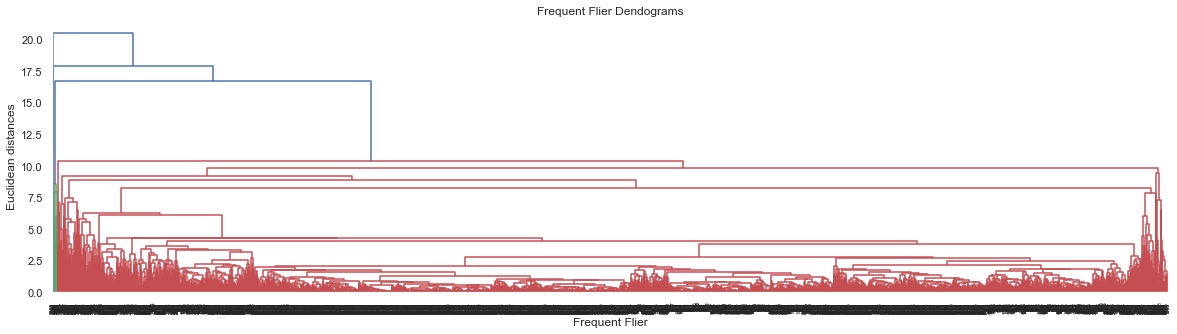

In [22]:
plt.figure(figsize=(20,5))
plt.title("Frequent Flier Dendograms")
dend = sch.dendrogram(sch.linkage(std_df, method='average'))
plt.xlabel('Frequent Flier')
plt.ylabel('Euclidean distances')

### 4) Weighted Linkage:

Text(0, 0.5, 'Euclidean distances')

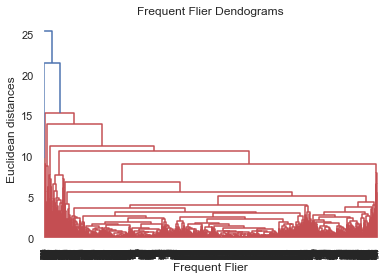

In [23]:
### 4) Average Linkage:plt.figure(figsize=(20,5))
plt.title("Frequent Flier Dendograms")
dend = sch.dendrogram(sch.linkage(std_df, method='weighted'))
plt.xlabel('Frequent Flier')
plt.ylabel('Euclidean distances')

### 5) Median Linkage:

Text(0, 0.5, 'Euclidean distances')

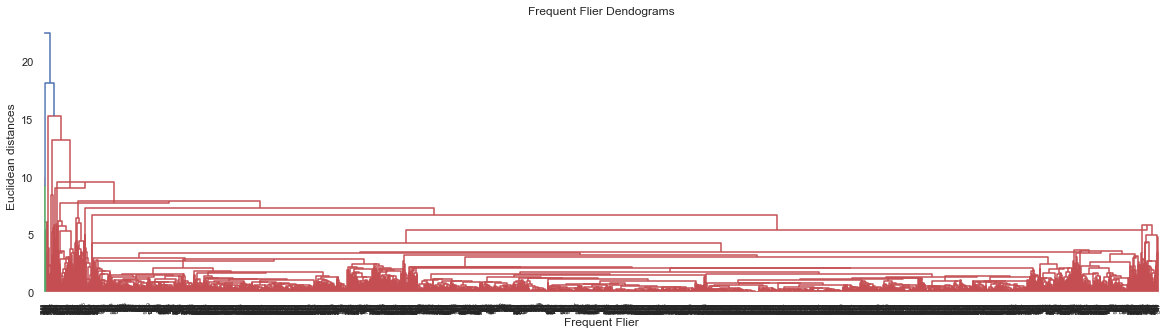

In [24]:
plt.figure(figsize=(20,5))
plt.title("Frequent Flier Dendograms")
dend = sch.dendrogram(sch.linkage(std_df, method='median'))
plt.xlabel('Frequent Flier')
plt.ylabel('Euclidean distances')

### 6) Ward Linkage:

Text(0, 0.5, 'Euclidean distances')

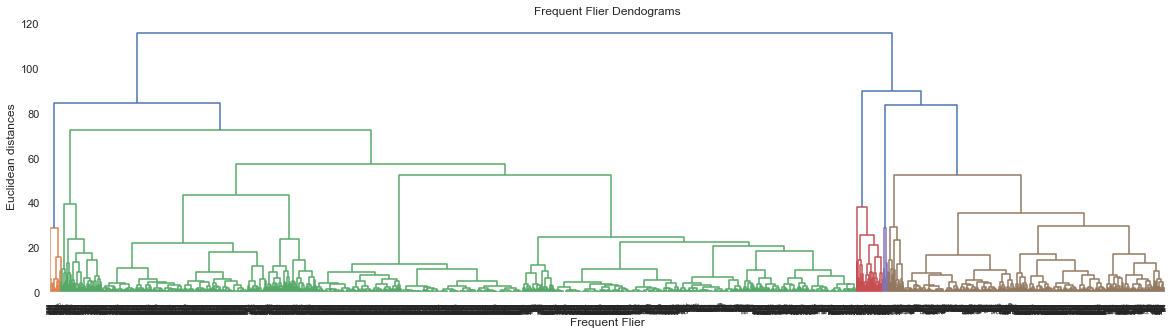

In [25]:
plt.figure(figsize=(20,5))
plt.title("Frequent Flier Dendograms")
dend = sch.dendrogram(sch.linkage(std_df, method='ward'))
plt.xlabel('Frequent Flier')
plt.ylabel('Euclidean distances')

In [26]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [27]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(df)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# Fetch the cluster labels
df['cluster labels']= y_pred

In [29]:
# Let's see which State falls in which cluster
df[['ID','cluster labels']]

,ID,cluster labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
3994,4017,0
3995,4018,0
3996,4019,0
3997,4020,0


# Cluster Analysis:

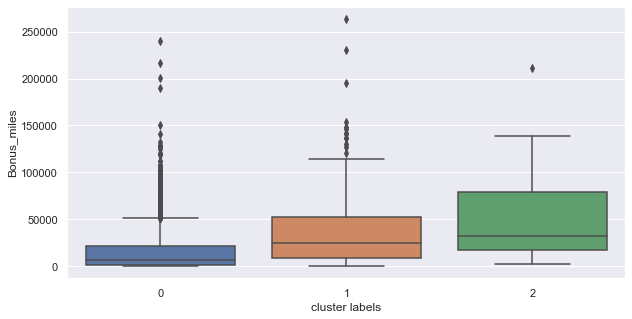

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Bonus_miles', data=df)

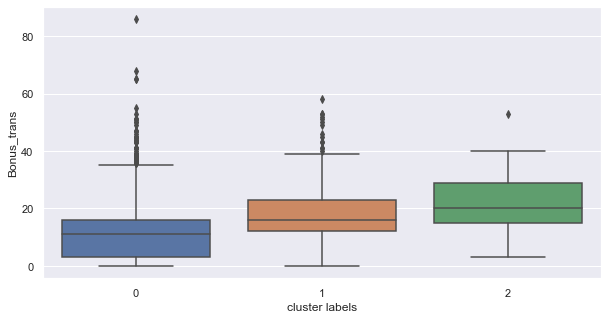

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Bonus_trans', data=df)

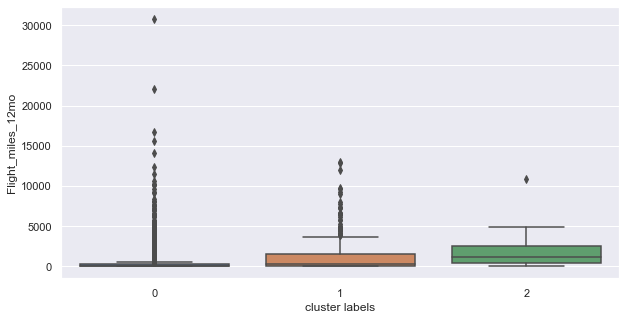

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Flight_miles_12mo', data=df)

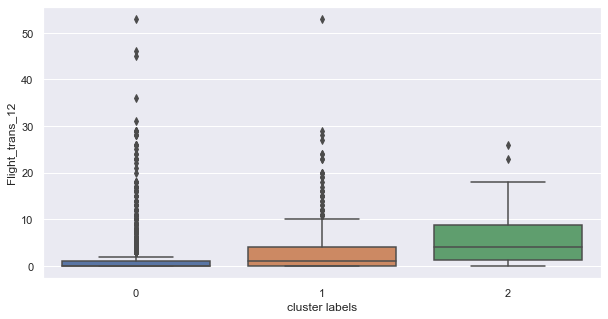

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Flight_trans_12', data=df)

Most of the customers with high Bonus_miles, Bonus_trans, Flight_miles_12mo and Flight_trans_12 are in cluster 1 and 2.



## Finding Clust_1, Clust_2 and Clust_3

In [34]:
Clust_1= df.groupby('cluster labels')['ID'].unique()[0]
Clust_1

array([   1,    2,    3, ..., 4019, 4020, 4021], dtype=int64)

In [35]:
Clust_2= df.groupby('cluster labels')['ID'].unique()[1]
Clust_2

array([   9,   22,   25,   31,   33,   46,   64,   69,   73,   74,   97,
        113,  114,  117,  124,  129,  130,  138,  141,  155,  158,  159,
        161,  170,  171,  175,  178,  191,  192,  196,  214,  216,  222,
        225,  228,  239,  241,  246,  248,  250,  259,  260,  262,  263,
        266,  284,  286,  287,  296,  301,  306,  307,  311,  314,  318,
        325,  327,  329,  331,  340,  352,  357,  362,  367,  385,  386,
        388,  394,  406,  410,  413,  419,  425,  426,  428,  433,  436,
        443,  450,  452,  454,  458,  459,  463,  470,  471,  473,  482,
        484,  506,  509,  521,  527,  536,  540,  551,  555,  560,  564,
        568,  569,  607,  616,  619,  627,  633,  637,  639,  658,  660,
        661,  667,  679,  688,  692,  693,  702,  703,  707,  711,  712,
        714,  718,  733,  753,  755,  760,  764,  766,  775,  781,  787,
        791,  797,  808,  830,  831,  832,  842,  847,  872,  879,  880,
        891,  892,  899,  907,  912,  916,  922,  9

In [36]:
Clust_3= df.groupby('cluster labels')['ID'].unique()[2]
Clust_3

array([  44,   90,  120,  154,  190,  224,  279,  294,  317,  322,  416,
        472,  477,  487,  494,  516,  638,  833, 1127, 1200, 1313, 1672,
       1956, 2508, 2676, 3795], dtype=int64)

In [40]:
#Mean of clusters 1 to 3
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster labels').mean(),1))
kmeans_mean_cluster

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster labels,,,,,,,,,,,,
0,2084.3,49420.6,117.9,2.0,1.0,1.0,15018.5,10.9,377.8,1.1,3986.4,0.3
1,1405.9,259110.4,378.9,2.8,1.0,1.0,35730.9,18.0,1181.8,3.5,5266.5,0.5
2,869.8,841016.8,512.7,3.3,1.0,1.1,52888.3,22.3,1797.8,6.7,6447.3,0.8


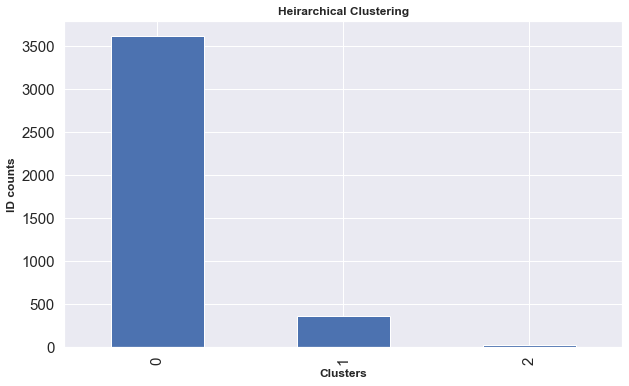

In [39]:
# Plotting barplot using groupby method to get visualize how many row no. of IDs in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['cluster labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Heirarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Insights:

<li>Cluster 0 is set of the recently acquired customer group as the Days since enrollment is lowest , moreover their flight transactions in last 12 months as well as the qualified miles for top class travel is also low.
    
<li>Cluster 1 also 2nd highest number of customer group which have Days since enrollment is low, moreover their flight transactions in last 12 months as well as the qualified miles for top class travel is also low.
        
<li>Cluster 1 is the set of high vintage customers who have highest number of non-flight bonus transaction miles and highest miles eligible for award travel
    
    
**<li>Cluster 0 and 1 can be Investigated further to identify their needs. Bring offers for them accordingly.**